# **`SUPPORT VECTOR REGRESSION IMPLEMENTATION`**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-1.00003387,  0.57050216],
       [ 0.01692603,  0.21857711],
       [-0.82011809,  0.2385523 ],
       ...,
       [ 1.0584271 ,  1.44732521],
       [-1.30115159,  0.41588308],
       [ 0.33396572, -0.38076763]])

In [5]:
y

array([-8.34712281e+01,  1.19146944e+01, -7.26172632e+01, -8.96960974e+01,
        1.49872571e+01,  9.01820324e+01, -1.03842059e+01,  3.28745219e+01,
        6.81461807e+01,  1.09850204e+02,  1.98085844e+01, -9.36576352e+01,
       -1.61275343e+02,  1.12399857e+02,  2.08861700e-01,  1.17595341e+02,
       -1.00334652e+02,  6.46619097e+00, -1.74421422e+00,  1.91070758e+01,
       -1.97070589e+01, -4.46722357e+01,  1.21791017e+02, -1.07825170e+02,
        1.01853869e+02,  1.06974438e+01,  2.18105165e+01,  2.37608507e+02,
        8.71572239e+01,  1.86876236e+01,  1.02890020e+02, -5.41787265e+01,
       -2.08586824e+01,  2.99369432e+01, -1.90524137e+02,  3.44351375e+01,
       -6.89167340e+01, -8.00085137e+00,  1.06266379e+02, -6.62258362e+01,
       -9.06713384e+01,  1.39443388e+02,  3.76906649e+01,  7.46392857e+01,
       -3.33173853e+01, -5.30692430e+01, -9.31113160e+01, -9.31273013e+01,
        9.42723327e+00,  2.30751535e+01, -6.40567278e+01, -1.75794575e+01,
       -2.60800889e+01,  

In [6]:
pd.DataFrame(X)[0]

0     -1.000034
1      0.016926
2     -0.820118
3     -0.302113
4      0.360577
         ...   
995    0.187888
996    0.141287
997    1.058427
998   -1.301152
999    0.333966
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

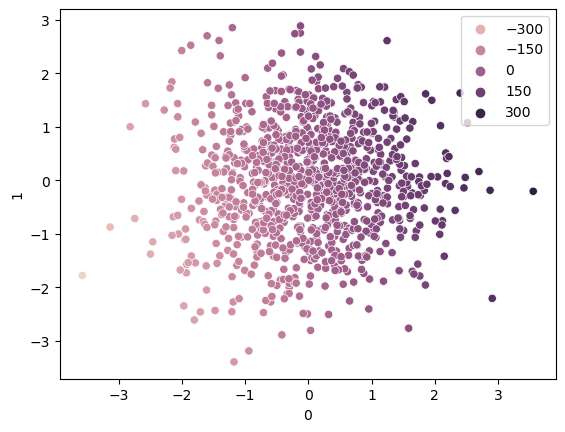

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.25 , random_state=10)

In [8]:
from sklearn.svm import SVR

In [10]:
svr = SVR(kernel="linear")

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[97.67611714, 28.45491792]])

In [15]:
#prediction
y_pred = svr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_test,y_pred))

0.9991597320601229


## HYPERPARAMETER TUNING WITH SVR

In [27]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {
    "C" : [0.1,1,10,100,1000],
    "gamma" : [1,0.1,0.01,0.001,0.0001],
    "kernel" : ["linear"],
    "epsilon" : [0.1,0.2,0.3]
}

In [28]:
grid = GridSearchCV(SVR(),param_grid=param_grid,scoring="neg_mean_squared_error",refit=True,cv=5,verbose=3)

In [29]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-2941.831 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-3941.862 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-2618.818 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-3259.245 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-2321.925 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-2941.831 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-3941.862 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-2618.818 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-3259.245 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-2321.925 total time=   0.0

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [30]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [31]:
## Prediction
y_pred4 = grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9991901735684697
